# Analysis of thermistor calibration

In [22]:
import sys
sys.path.append('../')

from SteinhartHart import SteinHart

import matplotlib
%matplotlib inline

import pandas as pd
import numpy as np 

In [11]:
##################################
#       Hyperparameters
##################################
min_temp = 10
max_temp = 40
avg_temp = 25

fluctuation = 0.5
precision_adc = 10

In [14]:
print("minium precision:", round((max_temp - min_temp)/(2**precision_adc), 3), "degrees")

minium precision: 0.029 degrees


## Retrieve the data

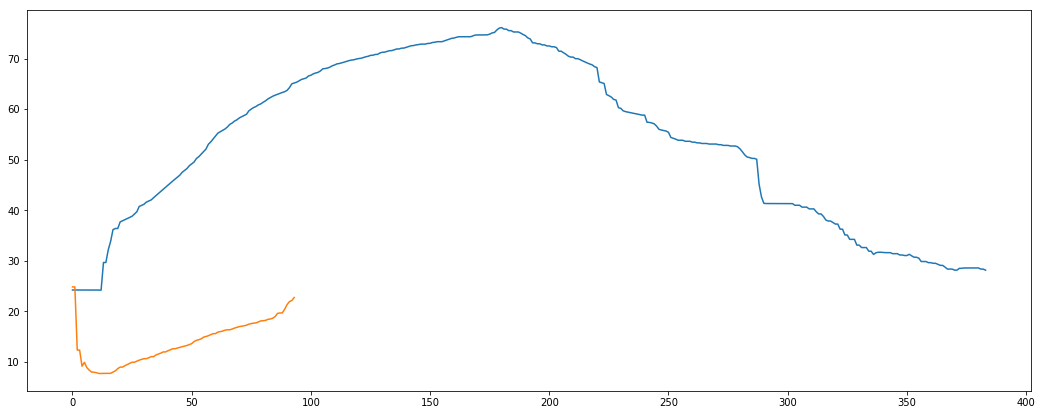

In [15]:
df_cold = pd.read_csv('../data/rev_csv_2018-11-27_10-35.csv')
df_hot = pd.read_csv('../data/rev_csv_2018-11-27_11-02.csv')

df_hot['Tprobe'].plot(figsize=(18, 7))
df_cold['Tprobe'].plot(figsize=(18, 7))

In [32]:
df_hot[df_hot["Tprobe"] <= 40.0]

Unnamed: 0          RNTC    Tprobe      Tcalc         A         B  \
0             0  47457.128906  24.18066        NaN       NaN       NaN   
1             1  47457.128906  24.18066        NaN       NaN       NaN   
2             2  47457.128906  24.18085        NaN       NaN       NaN   
3             3  47457.128906  24.18085        NaN       NaN       NaN   
4             4  47457.128906  24.18085        NaN       NaN       NaN   
5             5  47457.128906  24.18085        NaN       NaN       NaN   
6             6  47457.128906  24.18079        NaN       NaN       NaN   
7             7  47457.128906  24.18079        NaN       NaN       NaN   
8             8  47457.128906  24.18079        NaN       NaN       NaN   
9             9  47457.128906  24.18079        NaN       NaN       NaN   
10           10  47457.128906  24.18079        NaN       NaN       NaN   
11           11  47643.052838  24.16681        NaN       NaN       NaN   
12           12  47643.052838  24.15253        NaN       NaN       NaN   
13           13  37939.718805  29.62064        NaN       NaN       NaN   
14           14  37939.718805  29.62064        NaN       NaN       NaN   
15           15  34618.327703  32.11804  32.118040 -0.006399  0.001237   
16           16  32720.049505  33.80121  33.801210 -0.007200  0.001350   
17           17  30279.840000  36.13037  36.130370 -0.006632  0.001270   
18           18  30031.578947  36.35764  36.357640 -0.006391  0.001236   
19           19  29784.896661  36.35764  36.617820 -0.006391  0.001236   
20           20  28455.703125  37.66019  37.660190 -0.004110  0.000915   
21           21  28218.925234  37.88919  37.889190 -0.003982  0.000897   
22           22  27866.511628  38.11414  38.114140 -0.003227  0.000790   
23           23  27633.384853  38.32614  38.326140 -0.003052  0.000766   
24           24  27401.694915  38.55096  38.550960 -0.002941  0.000750   
25           25  27056.825153  38.77902  38.779020 -0.002328  0.000664   
26           26  26828.669725  39.22214  39.222140 -0.003105  0.000773   
27           27  26264.339909  39.66162  39.661620 -0.002371  0.000670   
312         312  24090.132548  39.65683  38.697216 -0.000756  0.000467   
313         313  24728.826152  39.23776  38.076149 -0.000756  0.000467   
..          ...           ...       ...        ...       ...       ...   
354         354  34896.864407  30.66525  30.387387 -0.000756  0.000467   
355         355  35036.842105  30.48416  30.303148 -0.000756  0.000467   
356         356  35459.641638  29.81512  30.051415 -0.000756  0.000467   
357         357  35601.538462  29.81512  29.967829 -0.000756  0.000467   
358         358  35601.538462  29.81512  29.967829 -0.000756  0.000467   
359         359  35743.921233  29.59250  29.884404 -0.000756  0.000467   
360         360  35886.792453  29.59250  29.801138 -0.000756  0.000467   
361         361  36030.154639  29.46674  29.718031 -0.000756  0.000467   
362         362  36030.154639  29.46674  29.718031 -0.000756  0.000467   
363         363  36174.010327  29.27386  29.635082 -0.000756  0.000467   
364         364  36463.212435  29.05734  29.469652 -0.000756  0.000467   
365         365  36754.419411  29.04913  29.304841 -0.000756  0.000467   
366         366  37047.652174  28.71042  29.140641 -0.000756  0.000467   
367         367  37342.931937  28.32275  28.977045 -0.000756  0.000467   
368         368  37491.346154  28.32104  28.895470 -0.000756  0.000467   
369         369  37491.346154  28.32104  28.895470 -0.000756  0.000467   
370         370  37640.280210  28.10757  28.814044 -0.000756  0.000467   
371         371  37789.736842  28.10757  28.732764 -0.000756  0.000467   
372         372  38241.269841  28.46823  28.489799 -0.000756  0.000467   
373         373  38241.269841  28.46823  28.489799 -0.000756  0.000467   
374         374  38241.269841  28.53598  28.489799 -0.000756  0.000467   
375         375  38241.269841  28.53598  28.489799 -0.000756  0.000467   
376      

## Query the min max and average temperature to calculate the coefficients

In [16]:
df_cold.query(" Tprobe < " + str(min_temp) + " + " + str(fluctuation) + " and Tprobe > " + str(min_temp) + " - " + str(fluctuation))

Unnamed: 0          RNTC     Tprobe     Tcalc         A         B  \
5            5  92633.429395   9.859467  9.555594 -0.006903  0.001273   
24          24  95519.558824   9.654785  8.856749 -0.005254  0.001048   
25          25  94682.894737   9.873291  9.002135 -0.005254  0.001048   
26          26  94268.221574   9.873291  9.075063 -0.005254  0.001048   
27          27  93446.086957  10.084290  9.221389 -0.005254  0.001048   
28          28  93038.583815  10.290920  9.294787 -0.005254  0.001048   
29          29  92230.603448  10.441350  9.442055 -0.005254  0.001048   

           C        T1             R1        T2            R2        T3  \
5  -0.000003  9.088684   95519.558824  12.28146  78797.142857  24.78897   
24 -0.000002  7.646210  103049.535604  12.28146  78797.142857  24.78897   
25 -0.000002  7.646210  103049.535604  12.28146  78797.142857  24.78897   
26 -0.000002  7.646210  103049.535604  12.28146  78797.142857  24.78897   
27 -0.000002  7.646210  103049.535604  12.28146  78797.142857  24.78897   
28 -0.000002  7.646210  103049.535604  12.28146  78797.142857  24.78897   
29 -0.000002  7.646210  103049.535604  12.28146  78797.142857  24.78897   

              R3  
5   45995.480769  
24  45995.480769  
25  45995.480769  
26  45995.480769  
27  45995.480769  
28  45995.480769  
29  45995.480769

In [17]:
df_hot.query(" Tprobe < " + str(max_temp) + " + " + str(fluctuation) + " and Tprobe > " + str(max_temp) + " - " + str(fluctuation))

Unnamed: 0          RNTC    Tprobe      Tcalc         A         B  \
27           27  26264.339909  39.66162  39.661620 -0.002371  0.000670   
309         309  23050.362845  40.23434  39.756695 -0.000756  0.000467   
310         310  23255.895197  40.23434  39.542279 -0.000756  0.000467   
311         311  23359.110787  40.23434  39.435551 -0.000756  0.000467   
312         312  24090.132548  39.65683  38.697216 -0.000756  0.000467   

                C        T1            R1        T2            R2        T3  \
27  -1.185281e-06  24.16681  47643.052838  29.62064  37939.718805  39.66162   
309 -7.253362e-07  24.16681  47643.052838  50.23169  15378.395860  76.13272   
310 -7.253362e-07  24.16681  47643.052838  50.23169  15378.395860  76.13272   
311 -7.253362e-07  24.16681  47643.052838  50.23169  15378.395860  76.13272   
312 -7.253362e-07  24.16681  47643.052838  50.23169  15378.395860  76.13272   

               R3  
27   26264.339909  
309   6800.446927  
310   6800.446927  
311   6800.446927  
312   6800.446927

In [18]:
df_cold.query(" Tprobe < " + str(avg_temp) + " + " + str(fluctuation) + " and Tprobe > " + str(avg_temp) + " - " + str(fluctuation))

Unnamed: 0          RNTC    Tprobe  Tcalc   A   B   C  T1  R1  T2  R2  T3  \
0           0  45995.480769  24.78897    NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1           1  45995.480769  24.78897    NaN NaN NaN NaN NaN NaN NaN NaN NaN   

   R3  
0 NaN  
1 NaN

In [24]:
steinhart = SteinHart()
steinhart.feed(T=9.859467, R=92633.429395)
steinhart.feed(T=24.78897, R=45995.480769)
steinhart.feed(T=40.23434, R=23050.362845)

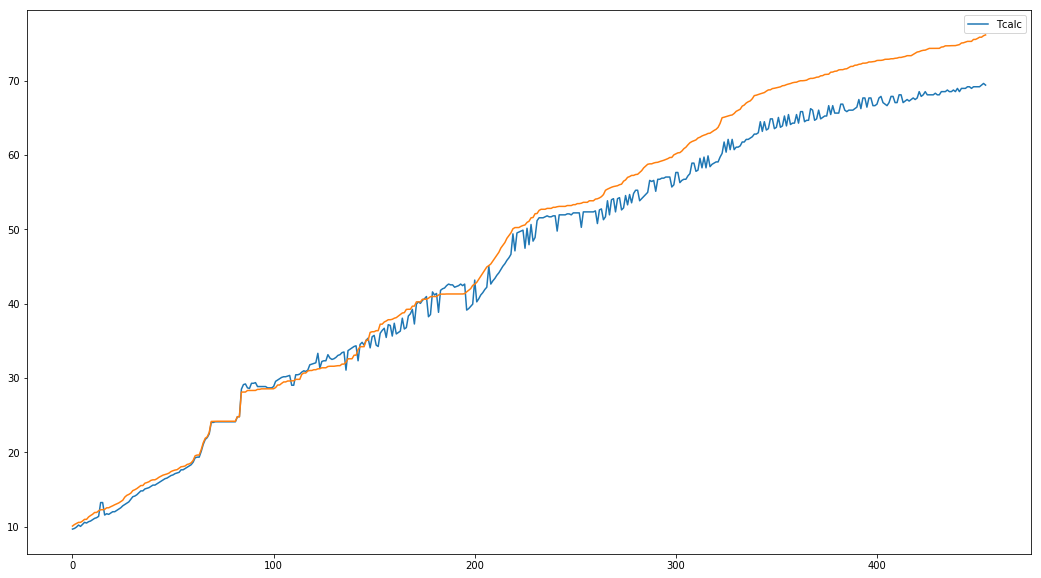

In [41]:
df_pred = df_cold[df_cold['Tprobe'] >= 10.0]
df_pred = df_pred.append(df_hot[df_hot['Tprobe'] <= 80.0], ignore_index=True)
df_pred = df_pred.sort_values('Tprobe').reset_index()

df_pred['Tcalc'] = df_pred.apply(lambda r: steinhart.calculateT(r["RNTC"]), axis=1)
df_pred['Tcalc'].plot(figsize=(18, 10), legend=True)
df_pred['Tprobe'].plot()